<a href="https://colab.research.google.com/github/njafarov/Data-Science/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic credit analysis

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("Credit.csv")
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [12]:
df.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

As we can see, we have mixed data types, namely int, float and object. First, let's try to use only numerical variables in our multi_linear regression model, and then compare the model with the one that includes all variables.   

In [52]:
# Balance is our y
# The rest will be X

X = df.drop('Balance',axis=1)
y = df['Balance']

In [14]:
# Seperate all numerical variables from the data set
num_var = ['Income','Limit','Rating','Cards','Age','Education']
x_num = df[num_var]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_num,y,train_size=0.8,random_state=42)

model1 = LinearRegression().fit(x_train,y_train)
train_score = model1.score(x_train, y_train)
test_score = model1.score(x_test,y_test)
coef1 = pd.DataFrame(model1.coef_, index=x_train.columns, columns = ['Beta_value'])
print("Train score: ", round(train_score,2))
print("Test score: ", round(test_score))
print(coef1)


Train score:  0.89
Test score:  1
           Beta_value
Income      -7.288376
Limit        0.168552
Rating       1.366646
Cards       17.074510
Age         -0.919265
Education    2.163956


[Text(0.5, 1.0, 'Model coefficiants')]

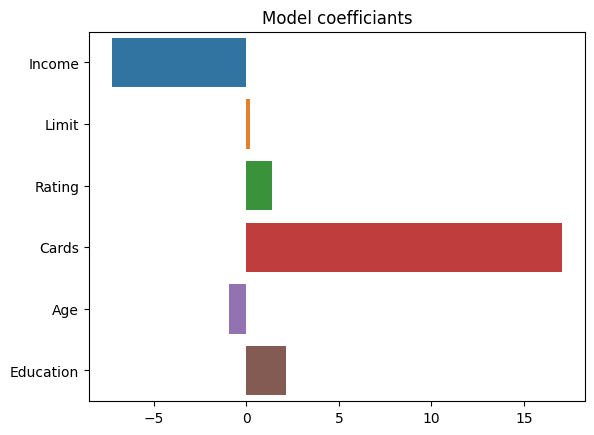

In [38]:
sns.barplot(coef1.T,orient='h').set(title="Model coefficiants")

We could not find any new information so far. It is obvous that in order balance to be high in your card, you have to have a card and income. What will happen if we add dummy variables as well?

In [30]:
# Convert objects into dummy variables
df_all = pd.get_dummies(X,drop_first=True)
df_all.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,0,0,0,1,0
3,4,148.924,9504,681,3,36,11,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,0,0,1,0,1


In [39]:
x_train,x_test,y_train,y_test = train_test_split(df_all,y,train_size=0.8,random_state=42)

model2 = LinearRegression().fit(x_train,y_train)
train_score = model2.score(x_train, y_train)
test_score = model2.score(x_test,y_test)
coef2 = pd.DataFrame(model2.coef_, index=x_train.columns, columns = ['Beta_value'])
print("Train score: ", round(train_score,2))
print("Test score: ", round(test_score))
print(coef2)

Train score:  0.96
Test score:  1
                     Beta_value
Unnamed: 0             0.047888
Income                -7.560012
Limit                  0.197079
Rating                 0.988091
Cards                 19.022781
Age                   -0.624089
Education             -1.071019
Gender_Female        -11.155359
Student_Yes          418.575592
Married_Yes           -6.997244
Ethnicity_Asian       13.349974
Ethnicity_Caucasian   10.495689


<Axes: >

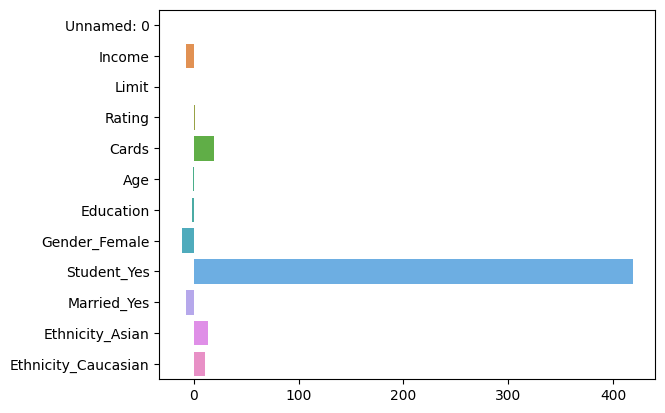

In [40]:
sns.barplot(coef2.T, orient = 'h')

In [47]:
# Coefficients of Student_Yes and Income variables

col = ['Income','Student_Yes']
model3 = LinearRegression().fit(x_train[col],y_train)

beta0 = model3.intercept_
beta1 = model3.coef_[col.index('Income')]
beta2 = model3.coef_[col.index('Student_Yes')]

coef3 = pd.DataFrame([beta0,beta1,beta2], index=["Intercept"]+col, columns = ["Beta"])
coef3





,Beta
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


[Text(0.5, 1.0, 'Model Coefficients')]

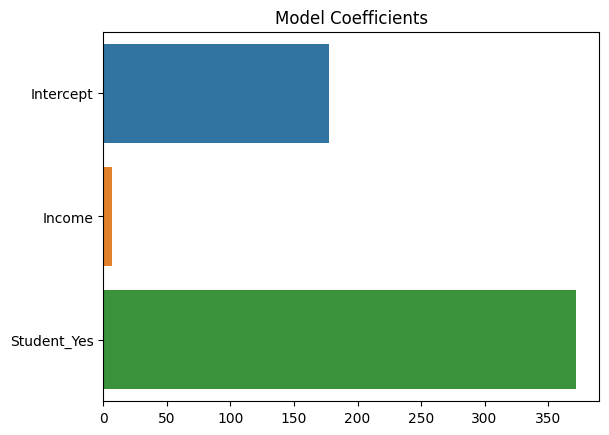

In [49]:
sns.barplot(data=coef3.T, orient='h').set(title='Model Coefficients')

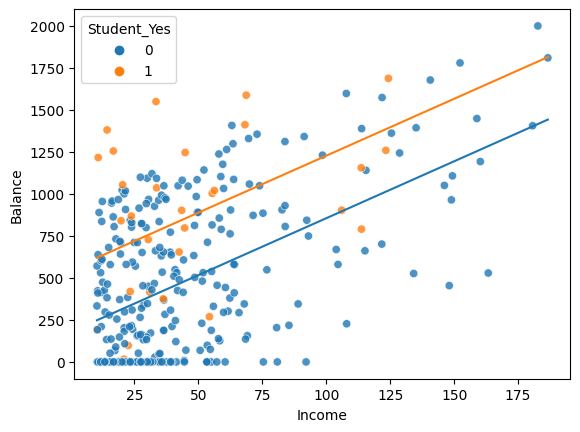

In [53]:
# Create space of x values to predict on.
x_space = np.linspace(X['Income'].min(), X['Income'].max(), 1000)

# Generate 2 sets of predictions based on best categorical feature value.
# When categorical feature is true/present (1)
y_hat_yes = 177.658909 + 6.773090 * x_space + 371.895694 * 1
# When categorical feature is false/absent (0)
y_hat_no = 177.658909 + 6.773090 * x_space + 371.895694 * 0
# Plot the 2 prediction lines for students and non-students.
ax = sns.scatterplot(data=pd.concat([x_train, y_train], axis=1), x='Income', y='Balance', hue=col[1], alpha=0.8)
ax.plot(x_space, y_hat_no)
ax.plot(x_space, y_hat_yes);